In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import textwrap

In [2]:
df = pd.read_csv('Waste.csv')
df.head()

,GDP,Metal,Others,Population,Electronic tons,Hazardous tons,Total MSW,GDP Per Capita,Unit Per Capita,Organic,Glass,Paper/Carboard,Plastic,Treatment/Recycling,Info System,Agency,Law,PPP
0,21.193311,1.722767,3.047692,11.544298,6.551080,6.921987,11.386591,9.649013,-9.806720,25.466667,5.900000,22.000000,11.300000,11.000000,1,1,1,1
1,23.787293,1.061257,2.567766,17.360982,9.903488,12.437678,15.543358,6.426310,-8.243935,49.746667,3.903333,16.436667,12.276667,25.530000,1,1,1,1
2,25.358406,1.481605,2.442347,17.038225,11.429544,12.437678,15.253838,8.320181,-10.104567,51.800000,6.700000,11.900000,13.500000,25.530000,1,1,1,1
3,23.323811,1.568616,2.721953,14.873545,9.903488,8.650818,13.949135,8.450266,-9.374676,51.400000,4.500000,9.900000,9.600000,35.200000,0,1,1,0
4,21.923195,0.955511,2.451005,11.319717,6.141636,7.488853,10.668955,10.603478,-11.254239,31.200000,8.200000,35.100000,11.300000,24.333333,1,1,1,1


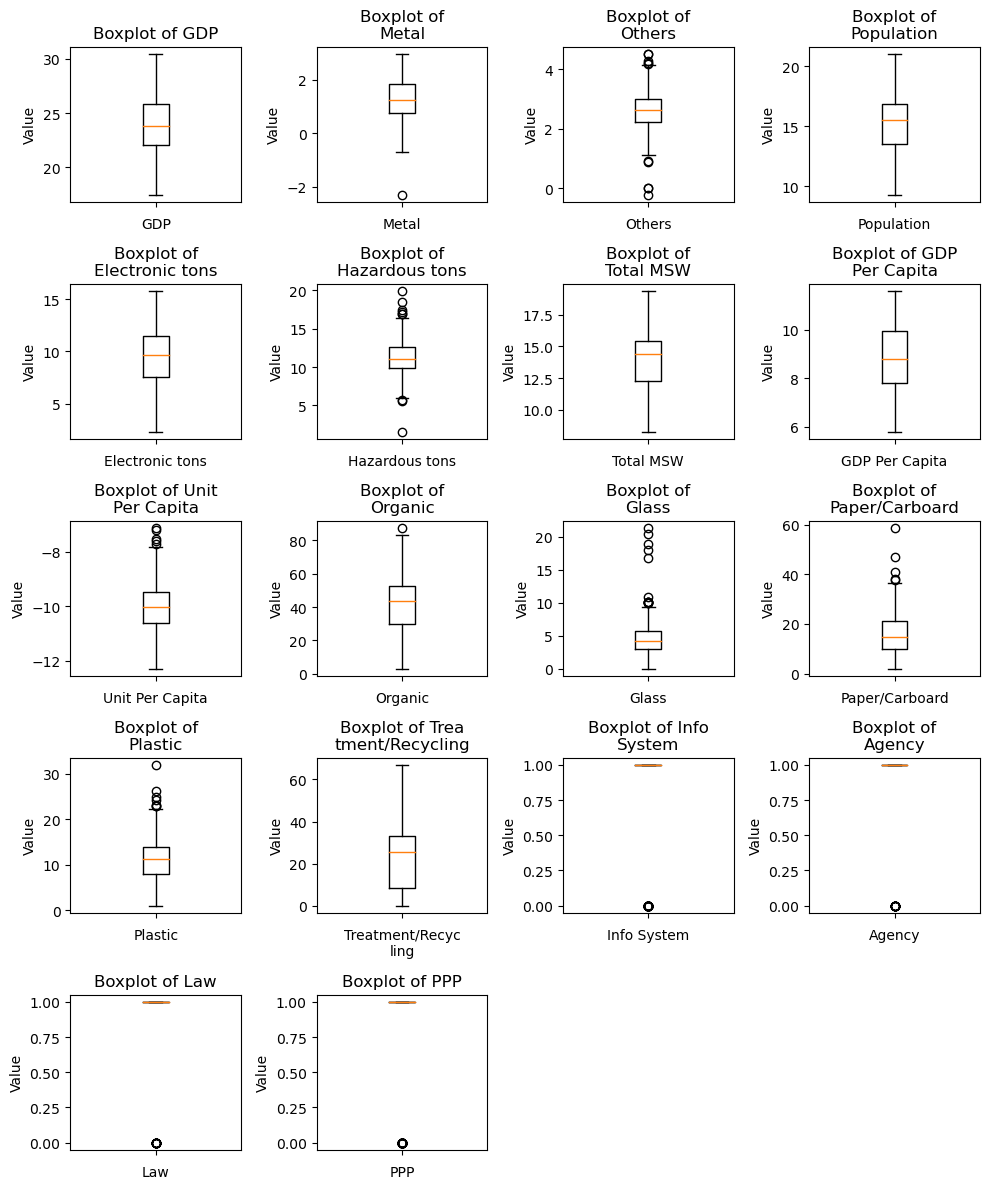

In [3]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(10, 12))
axes = axes.flatten()


for i, column in enumerate(df.columns[:18]):
    wrapped_title = "\n".join(textwrap.wrap(f'Boxplot of {column}', width=15))
    wrapped_col = "\n".join(textwrap.wrap(f'{column}', width=15))
    axes[i].boxplot(df[column].dropna())
    axes[i].set_title(f'{wrapped_title}')
    axes[i].set_xlabel(wrapped_col)
    axes[i].set_ylabel('Value')
    axes[i].set_xticklabels([])
# Remove the last two subplots
for i in range(18, len(axes)):
    fig.delaxes(axes[i])

    # Save the scatter plot as an image file (e.g., PNG, PDF, SVG)
#plt.savefig('boxplot.png')
# Adjust layout
plt.tight_layout()
plt.show()

## `` Removing the Outliers``

In [4]:
# Calculate the Quartiles and the Inter Quartile Range (IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Reducing the outliers to lower and upper bounds
data_clipped = df.clip(lower=lower_bound, upper=upper_bound, axis=1)

In [5]:
print('Shape of the data', data_clipped.shape)
data_clipped.head()

Shape of the data (217, 18)


,GDP,Metal,Others,Population,Electronic tons,Hazardous tons,Total MSW,GDP Per Capita,Unit Per Capita,Organic,Glass,Paper/Carboard,Plastic,Treatment/Recycling,Info System,Agency,Law,PPP
0,21.193311,1.722767,3.047692,11.544298,6.551080,6.921987,11.386591,9.649013,-9.806720,25.466667,5.900000,22.000000,11.300000,11.000000,1,1,1,1
1,23.787293,1.061257,2.567766,17.360982,9.903488,12.437678,15.543358,6.426310,-8.243935,49.746667,3.903333,16.436667,12.276667,25.530000,1,1,1,1
2,25.358406,1.481605,2.442347,17.038225,11.429544,12.437678,15.253838,8.320181,-10.104567,51.800000,6.700000,11.900000,13.500000,25.530000,1,1,1,1
3,23.323811,1.568616,2.721953,14.873545,9.903488,8.650818,13.949135,8.450266,-9.374676,51.400000,4.500000,9.900000,9.600000,35.200000,1,1,1,1
4,21.923195,0.955511,2.451005,11.319717,6.141636,7.488853,10.668955,10.603478,-11.254239,31.200000,8.200000,35.100000,11.300000,24.333333,1,1,1,1


## `` Plotting Boxplot``

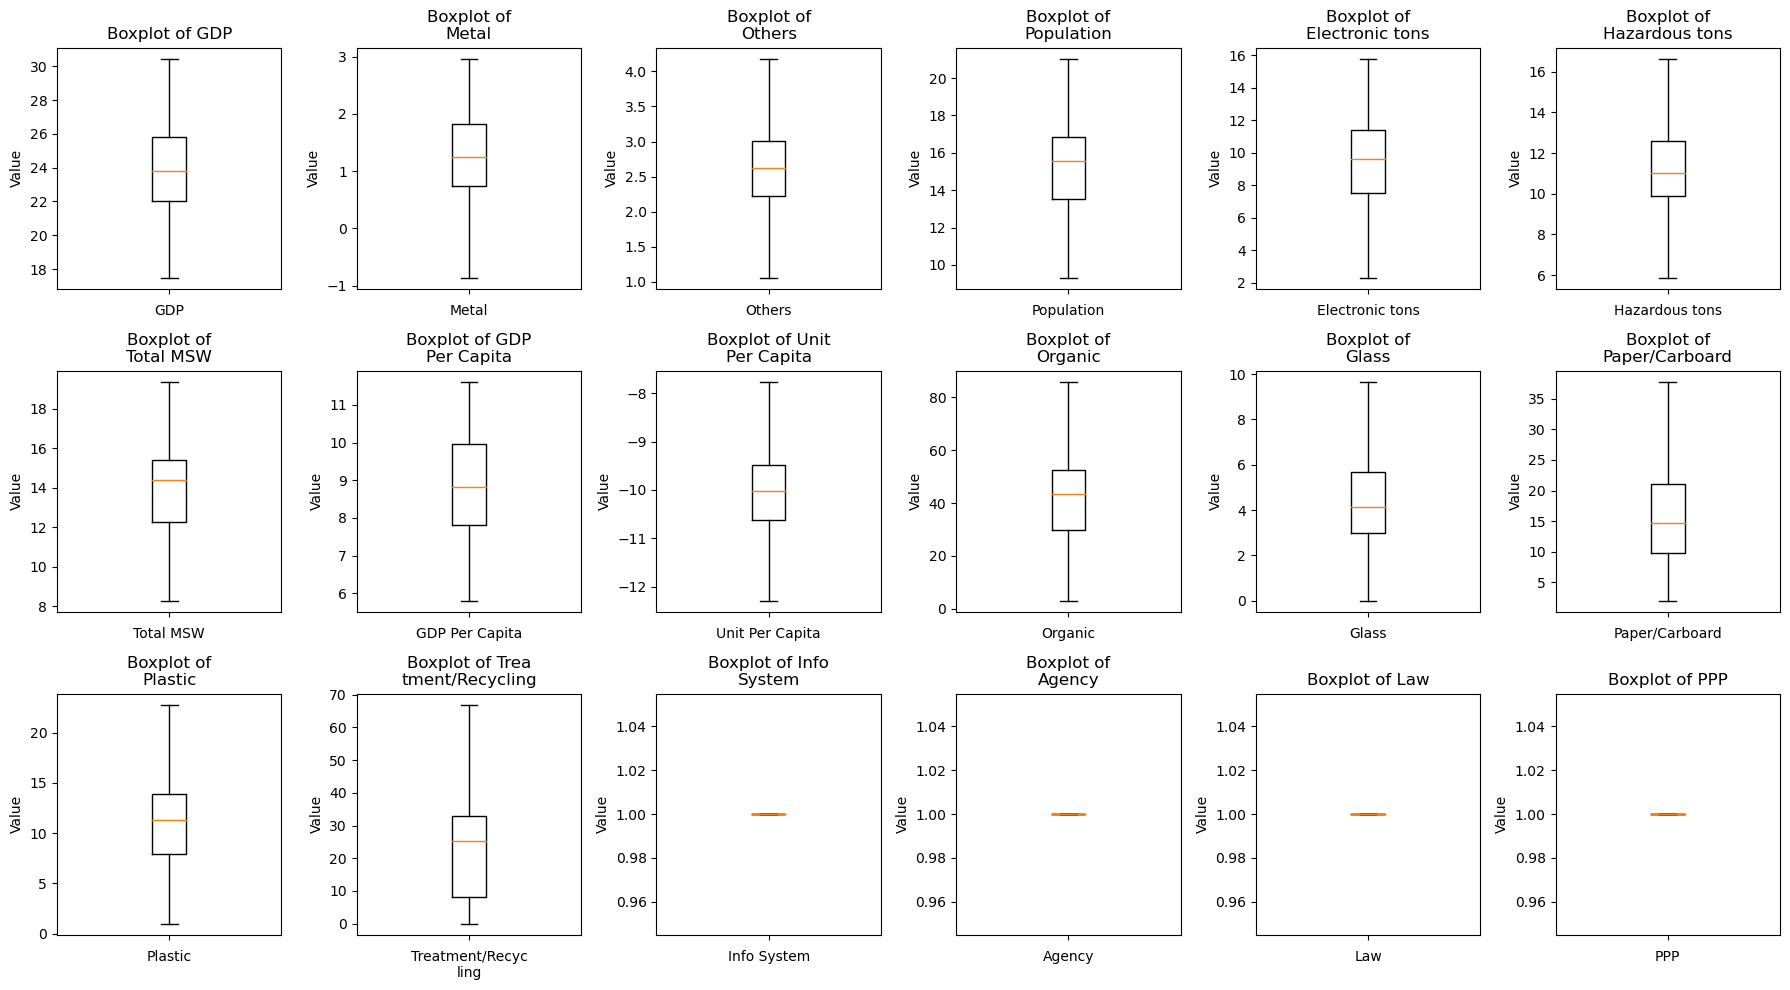

In [6]:
import textwrap
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'trimmed_data' with the columns you want to plot

# Create subplots
fig, axes = plt.subplots(3, 6, figsize=(18, 10))  # Adjust the size as needed
axes = axes.flatten()

# Plot boxplots on the subplots
for i, column in enumerate(data_clipped.columns[:18]):
    wrapped_title = "\n".join(textwrap.wrap(f'Boxplot of {column}', width=15))
    wrapped_col = "\n".join(textwrap.wrap(f'{column}', width=15))
    axes[i].boxplot(data_clipped[column].dropna())
    axes[i].set_title(f'{wrapped_title}')
    axes[i].set_xlabel(wrapped_col)
    axes[i].set_ylabel('Value')

    # Remove x-axis ticks
    axes[i].set_xticklabels([])

# Remove the last unused subplots
for i in range(18, len(axes)):
    fig.delaxes(axes[i])

# Save the scatter plot as an image file (e.g., PNG, PDF, SVG)
#plt.savefig('boxplot.png')

# Adjust layout
plt.tight_layout()
plt.show()


## `` Separating Data Into Input and Output Features ``

In [7]:
# Separating Input variables and Target variable
X = data_clipped.drop('Total MSW', axis = 1)
y = data_clipped['Total MSW']
# Display the shape of the original and modified DataFrames
print("Shape of the Feature Variables  :", X.shape)
print("Shape of the Target Variables   :", y.shape)

Shape of the Feature Variables  : (217, 17)
Shape of the Target Variables   : (217,)


## `` 1. Linear Regression Model ``

In [8]:
# Importing Necessary Libraries for Linear Regression Model
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score

In [9]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Normalizing the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
# Constructing Linear Regression Model
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)
y_pred_lm = lm.predict(X_test_scaled)

#Printing the results
print(f'MSE on Training: {mean_squared_error(y_train, lm.predict(X_train_scaled)):.3f}')
print(f'MAE on Training: {mean_absolute_error(y_train, lm.predict(X_train_scaled)):.3f}')
print(f'R^2 on Validation: {np.mean(cross_val_score(lm, X, y,cv=5)):.3f}')
print(f'R^2 on Training: {r2_score(y_train, lm.predict(X_train_scaled)):.3f}')
print(f'MSE on Validation: {mean_squared_error(y,cross_val_predict(lm, X, y, cv=5)):.3f}')
print(f'MAE on Validation: {mean_absolute_error(y,cross_val_predict(lm, X, y, cv=5)):.3f}')

MSE on Training: 0.004
MAE on Training: 0.027
R^2 on Validation: 0.999
R^2 on Training: 0.999
MSE on Validation: 0.004
MAE on Validation: 0.025


 ### ``` Comment ```
`While the LRM model achieves an impressive R-squared value of approximately 100%, we need to be cautious about interpreting this as perfection. In real-world applications, models are expected to have some level of error due to factors like data noise and inherent limitations in capturing complex relationships....`

## ``2. Artificial Neurol Networks (ANNs)``

In [23]:
# Importing the necessary Libraries
from keras.layers import Dropout
from sklearn.model_selection import ParameterGrid
from keras.models import Sequential
from keras.layers import Dense

# Creating a custom model which capable of handling hyperparameter tunning
def create_ann_model(neurons=1, hidden_layers=1, learning_rate=0.01, optimizer='adam', dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train_scaled.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))  # Add dropout to the input layer
    
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu'))
        model.add(Dropout(dropout_rate))  # Add dropout to hidden layers
    
    model.add(Dense(1, activation='linear'))  
    
    # Compile the model
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])
    
    return model
# Grid Search parameters
param_grid = {
    'neurons': [8, 16, 32],
    'hidden_layers': [1, 2, 3],
    'learning_rate': [0.001, 0.01, 0.1],
    'optimizer': ['adam', 'sgd'],
    'dropout_rate': [0.0, 0.2, 0.5]  
}
best_params = None
best_mse = float('inf')
best_model = None
best_history = None
for params in ParameterGrid(param_grid):
    ann_model = create_ann_model(**params)
    history = ann_model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=20, verbose=0)
    
   
    y_pred_ann = ann_model.predict(X_test_scaled)
    mse_ann_test = mean_squared_error(y_test, y_pred_ann)
    
    if mse_ann_test < best_mse:
        best_mse = mse_ann_test
        best_params = params
        best_model = ann_model
        best_history = history

# Print the best hyperparameters and results
print("Best Hyperparameters:", best_params)
print("Mean Squared Error on Test Set (ANN):", best_mse)

2/2 [==============================] - 0s 4ms/step
Best Hyperparameters: {'dropout_rate': 0.2, 'hidden_layers': 1, 'learning_rate': 0.001, 'neurons': 8, 'optimizer': 'sgd'}
Mean Squared Error on Test Set (ANN): 0.4443911006373552


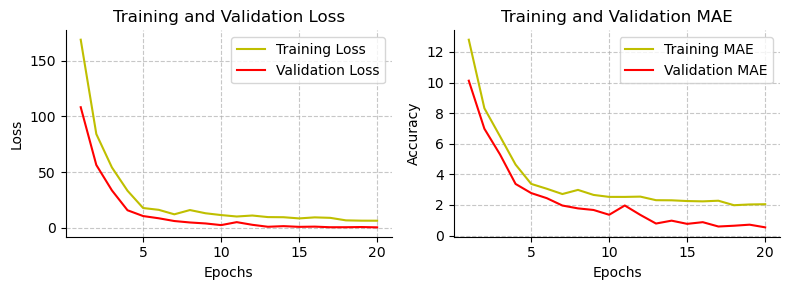

In [24]:
# Access the training history of the best model
best_loss = best_history.history['loss']
best_val_loss = best_history.history['val_loss']
best_mae = best_history.history['mae']
best_val_mae = best_history.history['val_mae']
loss = best_loss
val_loss = best_val_loss
acc = best_mae
val_acc = best_val_mae
epochs = range(1, len(loss)+1)

# Plotting the Costs
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(8,3))
axes[0].plot(epochs, loss, 'y', label = 'Training Loss')
axes[0].plot(epochs, val_loss, 'r', label = 'Validation Loss')
axes[0].set_title('Training and Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

axes[0].legend()
axes[1].plot(epochs, acc, 'y', label = 'Training MAE')
axes[1].plot(epochs, val_acc, 'r', label = 'Validation MAE')
axes[1].set_title('Training and Validation MAE')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

plt.legend()

plt.tight_layout()
plt.savefig('ANN1_loss.png')
plt.show()

In [52]:
ytrainpre = best_model.predict(X_train_scaled)
print(f'MSE on Training: {mean_squared_error(y_train, ytrainpre):.3f}')
print(f'MAE on Training: {mean_absolute_error(y_train, ytrainpre):.3f}')
print(f'R^2 on Training: {r2_score(y_train, ytrainpre):.3f}')
val_mae = np.min(best_history.history['val_mae'])
val_mse = np.min(best_history.history['val_loss'])
print(f'MAE on Validation: {val_mae:.3f}')
print(f'MSE on Validation: {val_mse:.3f}')

6/6 [==============================] - 0s 3ms/step
MSE on Training: 0.508
MAE on Training: 0.596
R^2 on Training: 0.901
MAE on Validation: 0.537
MSE on Validation: 0.412


## `` Refining the Two models``

` Less Important Features which deter will be dropped. Features will be dropped according their correlation.`

In [53]:
# Feature Refinement
drp = ['Plastic', 'Paper/Carboard','Unit Per Capita', 'GDP Per Capita', 'Others', 'Total MSW']
X = data_clipped.drop(columns=drp, axis = 1)
y = data_clipped['Total MSW']
# Display the shape of the original and modified DataFrames
print("Original DataFrame shape:", data_clipped.shape)
print("Selected Features shape :", X.shape)
print("Target Variable shape   :",  y.shape)

Original DataFrame shape: (217, 18)
Selected Features shape : (217, 12)
Target Variable shape   : (217,)


## ``1. Linear Regression Model - Refined Model``

In [57]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Constructing Linear Regression Model
lm = LinearRegression()
ridge_model = Ridge(alpha=2.0)
lm.fit(X_train_scaled, y_train)
ridge_model.fit(X_train_scaled, y_train)

# Linear Regression Model
#Printing the results
print(f'MSE on Training:    {mean_squared_error(y_train, lm.predict(X_train_scaled)):.3f}')
print(f'MSE on Testing:     {mean_squared_error(y_test, lm.predict(X_test_scaled)):.3f}')
print(f'MAE on Training:    {mean_absolute_error(y_train, lm.predict(X_train_scaled)):.3f}')
print(f'MAE on Testing:     {mean_absolute_error(y_test, lm.predict(X_test_scaled)):.3f}')
print(f'R^2 on Validation:  {np.mean(cross_val_score(lm, X, y,cv=10)):.3f}')
print(f'R^2 on Training:    {r2_score(y_train, lm.predict(X_train_scaled)):.3f}')
print(f'R^2 on Testing:     {r2_score(y_test, lm.predict(X_test_scaled)):.3f}')
print(f'MSE on Validation:  {mean_squared_error(y,cross_val_predict(lm, X, y, cv=5)):.3f}')
print(f'MAE on Validation:  {mean_absolute_error(y,cross_val_predict(lm, X, y, cv=5)):.3f}')

MSE on Training:    0.198
MSE on Testing:     0.188
MAE on Training:    0.319
MAE on Testing:     0.324
R^2 on Validation:  0.953
R^2 on Training:    0.961
R^2 on Testing:     0.961
MSE on Validation:  0.217
MAE on Validation:  0.342


## `` Examining the Model residual``

<Axes: >

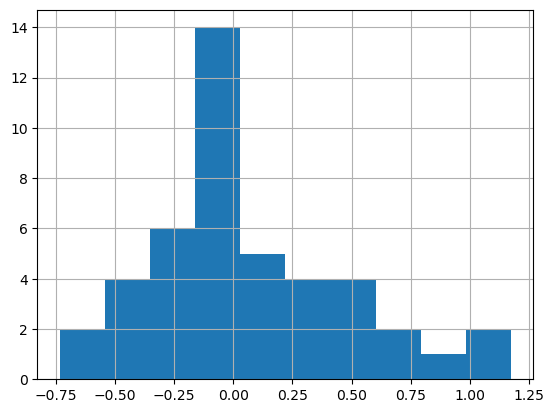

In [21]:
y_pred = lm.predict(X_test_scaled)
yt = y_pred - y_test
yt.hist()
plt.show()

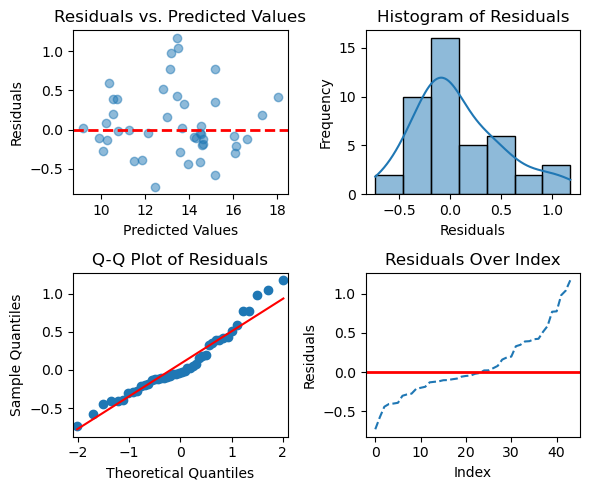

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# Assuming y_true and y_pred are NumPy arrays or Pandas Series

# Set up subplots
fig, axes = plt.subplots(2, 2, figsize=(6, 5))

# Scatter plot of residuals against predicted values
axes[0, 0].scatter(y_pred, yt, alpha=0.5)
axes[0, 0].set_title('Residuals vs. Predicted Values')
axes[0, 0].set_xlabel('Predicted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)  # Horizontal line at y=0

# Histogram or Kernel Density Plot of Residuals
sns.histplot(yt, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Residuals')
axes[0, 1].set_xlabel('Residuals')
axes[0, 1].set_ylabel('Frequency')

# Q-Q Plot (Quantile-Quantile Plot)
sm.qqplot(yt, line='s', ax=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot of Residuals')

# Plotting Residuals Over Index (assuming index represents observations)
axes[1, 1].plot(np.sort(yt), linestyle='--')
axes[1, 1].set_title('Residuals Over Index')
axes[1, 1].set_xlabel('Index')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].axhline(y=0, color='red', linestyle='-', linewidth=2)  # Horizontal line at y=0

# Adjust layout
plt.tight_layout()
plt.show()


### `comments`
`Residuals look normal, no apparent violation of  LRM assumptions. Model Shows plausible results. `


## ``2. Artificial Neurol Networks (ANNs) - Refined Model``

In [58]:
# Building ANNs model
def create_ann_model(neurons=1, hidden_layers=1, learning_rate=0.01, optimizer='adam', dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train_scaled.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))  # Add dropout to the input layer
    
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu'))
        model.add(Dropout(dropout_rate))  # Add dropout to hidden layers
    
    model.add(Dense(1, activation='linear'))  
    
    # Compile the model
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])
    
    return model
param_grid = {
    'neurons': [8, 16, 32],
    'hidden_layers': [1, 2, 3],
    'learning_rate': [0.001, 0.01, 0.1],
    'optimizer': ['adam', 'sgd'],
    'dropout_rate': [0.0, 0.2, 0.5]
}
best_params = None
best_mse = float('inf')
best_model = None
best_history = None
for params in ParameterGrid(param_grid):
    ann_model = create_ann_model(**params)
    history = ann_model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=20, verbose=0)
    
   
    y_pred_ann = ann_model.predict(X_test_scaled)
    mse_ann_test = mean_squared_error(y_test, y_pred_ann)
    
    if mse_ann_test < best_mse:
        best_mse = mse_ann_test
        best_params = params
        best_model = ann_model
        best_history = history

# Print the best hyperparameters and results
print("Best Hyperparameters:", best_params)
print("Mean Squared Error on Test Set (ANN):", best_mse)

2/2 [==============================] - 0s 5ms/step


ValueError: Input contains NaN.

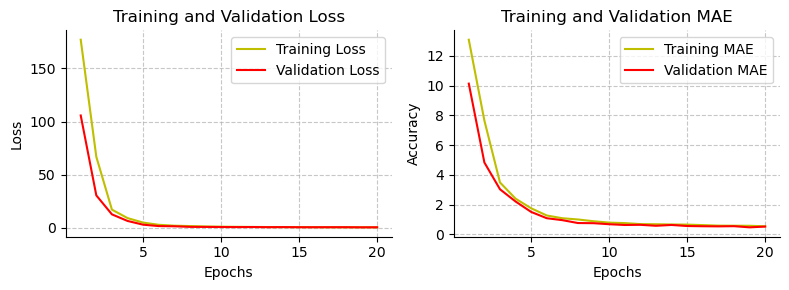

In [88]:
# Access the training history of the best model
best_loss = best_history.history['loss']
best_val_loss = best_history.history['val_loss']
best_mae = best_history.history['mae']
best_val_mae = best_history.history['val_mae']
loss = best_loss
val_loss = best_val_loss
acc = best_mae
val_acc = best_val_mae
epochs = range(1, len(loss)+1)

# Plotting the Loss metrics
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(8,3))
axes[0].plot(epochs, loss, 'y', label = 'Training Loss')
axes[0].plot(epochs, val_loss, 'r', label = 'Validation Loss')
axes[0].set_title('Training and Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

axes[0].legend()
axes[1].plot(epochs, acc, 'y', label = 'Training MAE')
axes[1].plot(epochs, val_acc, 'r', label = 'Validation MAE')
axes[1].set_title('Training and Validation MAE')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

plt.legend()

plt.tight_layout()
plt.savefig('ANN1_loss.png')
plt.show()

In [66]:
# Artificial Neurol Network Model
ytrainpre = best_model.predict(X_train_scaled)
print(f'MSE on Training: {mean_squared_error(y_train, best_model.predict(X_train_scaled)):.3f}')
print(f'MSE on Testing: {mean_squared_error(y_test, best_model.predict(X_test_scaled)):.3f}')
print(f'MAE on Training: {mean_absolute_error(y_train, ytrainpre):.3f}')
print(f'MAE on Testing: {mean_absolute_error(y_test, best_model.predict(X_test_scaled)):.3f}')
print(f'R^2 on Training: {r2_score(y_train, best_model.predict(X_train_scaled)):.3f}')
print(f'R^2 on Testing: {r2_score(y_test, best_model.predict(X_test_scaled)):.3f}')
val_mae = np.min(best_history.history['val_mae'])
val_mse = np.min(best_history.history['val_loss'])
print(f'MAE on Validation: {val_mae:.3f}')
print(f'MSE on Validation: {val_mse:.3f}')

6/6 [==============================] - 0s 3ms/step
MSE on Training: 0.443
2/2 [==============================] - 0s 4ms/step
MSE on Testing: 0.272
MAE on Training: 0.526
2/2 [==============================] - 0s 3ms/step
MAE on Testing: 0.417
6/6 [==============================] - 0s 3ms/step
R^2 on Training: 0.913
2/2 [==============================] - 0s 4ms/step
R^2 on Testing: 0.944
MAE on Validation: 0.470
MSE on Validation: 0.427


In [69]:
ytrainpre = ytrainpre.flatten()
ytrainpre.shape

(173,)

### ` Residual Analysis`

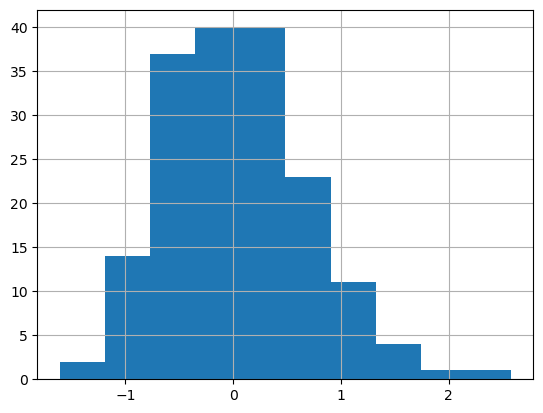

In [76]:
yt = ytrainpre - y_train
yt.hist(bins=10)
plt.show()

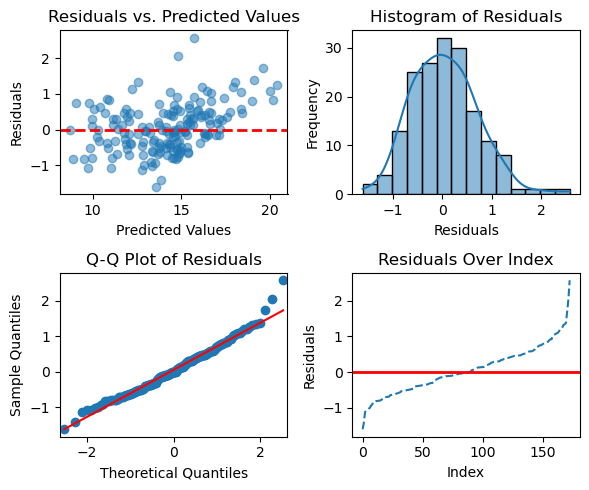

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# Assuming y_true and y_pred are NumPy arrays or Pandas Series

# Set up subplots
fig, axes = plt.subplots(2, 2, figsize=(6, 5))

# Scatter plot of residuals against predicted values
axes[0, 0].scatter(ytrainpre, yt, alpha=0.5)
axes[0, 0].set_title('Residuals vs. Predicted Values')
axes[0, 0].set_xlabel('Predicted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)  # Horizontal line at y=0

# Histogram or Kernel Density Plot of Residuals
sns.histplot(yt, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Residuals')
axes[0, 1].set_xlabel('Residuals')
axes[0, 1].set_ylabel('Frequency')

# Q-Q Plot (Quantile-Quantile Plot)
sm.qqplot(yt, line='s', ax=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot of Residuals')

# Plotting Residuals Over Index (assuming index represents observations)
axes[1, 1].plot(np.sort(yt), linestyle='--')
axes[1, 1].set_title('Residuals Over Index')
axes[1, 1].set_xlabel('Index')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].axhline(y=0, color='red', linestyle='-', linewidth=2)  # Horizontal line at y=0

# Adjust layout
plt.tight_layout()
plt.show()


### `Comments`
`While Artificial Neural Networks (ANNs) do not require any assumptions about the underlying model, residual models are relatively common. Comparing the Linear Regression Model (LRM) and ANNs, although the ANN model slightly outperforms LRM, their accuracies are quite close in the refined model. This contrasts with the unrefined model, where LRM achieved an R-squared accuracy of approximately 100% and an MSE very close to 0. This suggests that the results of the refined model are more reliable than those of the unrefined model. On the other hand, the performance of the ANN model has significantly improved in the refined model. `


## ``3. K-Means Clustering``

In [84]:
# Importing Necessary Libraries

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

# Perform dimensionality reduction using PCA for cluster plotting purposes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# Fit the model to the data

# Normalizing data
d2 = X.copy()
scaler.fit(d2)
d2 = scaler.transform(d2)

# Creating Custom K-means function

max_k =7  # Number of clusters to be run
wcss = []   # Within-cluster sum of squares

# Maximum number of iterations
max_iterations = 100

# Tolerance to determine convergence
tolerance = 1e-4

# Assign points to clusters
def assign_clusters(X, centroids):
    distances = np.sqrt(((X - centroids[:, np.newaxis]) ** 2).sum(axis=2))
    return np.argmin(distances, axis=0)

# Update cluster centroids
def update_centroids(X, labels, num_clusters):
    new_centroids = np.zeros((num_clusters, X.shape[1]))
    for cluster_idx in range(num_clusters):
        cluster_points = X[labels == cluster_idx]
        if len(cluster_points) > 0:
            new_centroids[cluster_idx] = cluster_points.mean(axis=0)
    return new_centroids
# Determing the appropriate number of clusters using Elbow method
for num_clusters in range(1, max_k + 1):
    # Randomly initialize cluster centroids
    initial_centers = d2[np.random.choice(d2.shape[0], num_clusters, replace=False)]
    centroids = initial_centers

    for i in range(max_iterations):
        # Assign points to clusters
        labels = assign_clusters(d2, centroids)

        # Update cluster centroids
        new_centroids = update_centroids(d2, labels, num_clusters)

        # Check for convergence
        if np.all(np.abs(new_centroids - centroids) < tolerance):
            break

        centroids = new_centroids

    # Calculate the within-cluster sum of squares (WCSS)
    wcss.append(np.sum((d2 - centroids[labels]) ** 2))

# Calculate the rate of change in WCSS
rate_of_change = np.diff(wcss)

# Find the "elbow point" where the rate of change slows down
elbow_point = None
for i in range(1, len(rate_of_change)):
    if (rate_of_change[i] - rate_of_change[i - 1]) < 25:
        elbow_point = i  # Add 1 to account for the difference calculation
        break

In [85]:
# Running K-means clusters with the determined number of clustering
num_clusters = elbow_point
initial_centers = X_pca[np.random.choice(X_pca.shape[0], num_clusters, replace=False)]
centroids = initial_centers

for i in range(max_iterations):
    # Assign points to clusters
    labels = assign_clusters(X_pca, centroids)
    
    # Update cluster centroids
    new_centroids = update_centroids(X_pca, labels, num_clusters)
    
    # Check for convergence
    if np.all(np.abs(new_centroids - centroids) < tolerance):
        break
    
    centroids = new_centroids


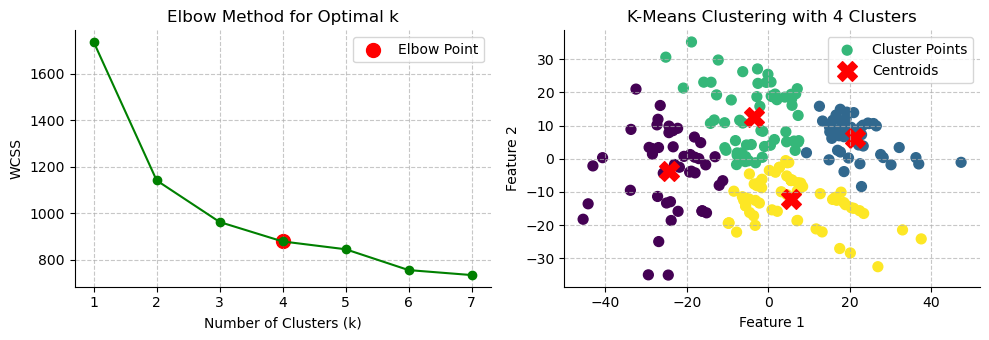

In [87]:
# Plotting The k optimal and the cluseting in a two dimensional plot
fig, axes = plt.subplots(1, 2, figsize=(10, 3.5))
# Plot the WCSS values for different k values
elbow_point
axes[0].plot(range(1, max_k + 1), wcss, marker='o', linestyle='-', color='g')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('WCSS')
axes[0].set_title('Elbow Method for Optimal k')
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Highlight the elbow point on the plot
axes[0].scatter(elbow_point, wcss[elbow_point - 1], c='red', s=100, label='Elbow Point', marker='o')
axes[0].legend()

# Visualize the clustered data
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=50, cmap='viridis', label='Cluster Points')
axes[1].scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")
axes[1].set_title(f"K-Means Clustering with {num_clusters} Clusters")
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('Kmeans.png')
plt.show()



In [95]:
centroids

array([[-24.27373225,  -3.78550817],
       [ 21.37954064,   6.29801746],
       [ -3.57742438,  12.63657948],
       [  5.62793054, -12.14377841]])

In [2]:


# Create a DataFrame
#df_cluster_centers = pd.DataFrame(cluster_centers, columns=[f'Cluster {i+1}' for i in range(cluster_centers.shape[1])], index=X.columns)


In [91]:
df1 = X.copy()
df1['Cluster']=labels

In [116]:
cluster_means = df1.groupby('Cluster').mean().T

cluster_means.columns = [f'Cluster {i+1}' for i in range(cluster_means.shape[1])] #???????
cluster_means = cluster_means.round(3)
cluster_means

,Cluster 1,Cluster 2,Cluster 3,Cluster 4
GDP,23.562,24.817,24.458,23.129
Metal,1.572,0.939,1.204,1.332
Population,13.997,16.458,15.309,14.899
Electronic tons,9.038,10.633,10.040,8.925
Hazardous tons,11.036,11.813,11.465,10.688
Organic,22.399,57.243,32.468,52.584
Glass,5.187,3.285,5.444,4.162
Treatment/Recycling,37.636,6.694,13.263,30.310
Info System,1.000,1.000,1.000,1.000
Agency,1.000,1.000,1.000,1.000


In [102]:
from sklearn.metrics import pairwise_distances

# Assuming you have the final cluster centroids stored in 'final_centroids'
# Replace this with your actual centroids
# final_centroids = ...

# Calculate pairwise distances between final cluster centroids
distances = pairwise_distances(centroids)

# Display the distances
print("Pairwise Distances between Final Cluster Centroids:")
distances


Pairwise Distances between Final Cluster Centroids:


array([[ 0.        , 46.75359681, 26.42010829, 31.04786819],
       [46.75359681,  0.        , 25.74931983, 24.25310405],
       [26.42010829, 25.74931983,  0.        , 26.43491434],
       [31.04786819, 24.25310405, 26.43491434,  0.        ]])

In [117]:
distance = pd.DataFrame(distances)
distance.columns = [f'{i+1}' for i in range(distance.shape[1])]
distance.index = [f'{i+1}' for i in range(distance.shape[1])]
distance = distance.round(3)
distance

,1,2,3,4
1,0.000,46.754,26.420,31.048
2,46.754,0.000,25.749,24.253
3,26.420,25.749,0.000,26.435
4,31.048,24.253,26.435,0.000
